# Question 1, 2

In [1]:
#imports
import nltk
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from itertools import islice

# custom functions
from helper import *

D:\Users\apoor\Miniconda3\envs\nlp\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\apoor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
filename = "../books/adventures_sherlock_holmes.txt"
sentences = getSents(filename)

In [3]:
# lower case words, and remove punctuations.
normalizedSentences = lowerPunct(sentences)

# add Start stop symbols
finalSentences = addStartStop(normalizedSentences)

# divide the corpus into test and train
train, test = train_test_split(finalSentences,\
                               test_size=0.2,\
                               random_state=42)

----

# Question 3

In [4]:
# finding the MLEs for all the ngrams
N = 4
mles = []
nGrams = [None]
for i in range(1, N + 1):
    nGrams.append(nGramCount(train, i))
    
for i in range(1, N + 1):
    mles.append(MLE(nGrams[i], nGrams[i-1]))

In [5]:
# change the value of ngram to get it's MLE
ngram = 3
dict(islice(mles[ngram-1].items(), 0, 15))

{'<s> but the': 0.08823529411764706,
 'but the deception': 0.023809523809523808,
 'the deception could': 1.0,
 'deception could not': 1.0,
 'could not be': 0.1346153846153846,
 'not be kept': 0.043478260869565216,
 'be kept up': 0.5,
 'kept up forever': 1.0,
 'up forever </s>': 1.0,
 '<s> oh sir': 0.05555555555555555,
 'oh sir do': 0.3333333333333333,
 'sir do you': 1.0,
 'do you not': 0.12,
 'you not think': 0.14285714285714285,
 'not think that': 0.4117647058823529}

In [6]:
# Possible number of ngrams possible
poss_avai=[]
for i in range(1, N+1):
    poss_avai.append(possible_avail(nGrams[i]))

In [7]:
# first val contains the possible no of ith ngrams
# second val is the number of unique ith ngrams
# where i > 1
s = ["unigrams", "bigrams", "trigrams", "quadgrams"]
for so in range(len(s)):
    print (s[so])
    print ("possible:", poss_avai[so][0])
    print ("present:", str(poss_avai[so][1]) + '\n')

unigrams
possible: 23698170
present: 6885

bigrams
possible: 823916121
present: 40594

trigrams
possible: 2301980878
present: 67853

quadgrams
possible: 2700573778
present: 73493



----

# Question 4
### part a (Sentence Generator)

In [8]:
'''
Sentence Generator:
No smoothing used till here.
'''
k = 10 # atleast k big sentences, if possible
for i in range(N, 0, -1):
    print ('sentence generated from' , i, 'gram model:') 
    print(Generator(mles[i-1], k))

sentence generated from 4 gram model:
only as much as i have already arranged what is to occur
sentence generated from 3 gram model:
sir i have spoiled him
sentence generated from 2 gram model:
it plantagenet blood showed that you startled at was not done me with an saying
sentence generated from 1 gram model:
wrack away some not i had you in said he


### part b (Sentence Probability in log-spc)

In [9]:
PrLog("all or and duke say so he rushed under it accompli", mles[1]) # only for 2gram model

-18.4677342168191

----

# Question 5 (Add1Smoothing)

In [10]:
'''
Add 1 Smoothing for bigrams returns
returns a dictionary with increased
counts for every possible bigram
'''
AD = Add1Smooth(nGrams[2], nGrams[1])

In [11]:
print ("New count 'This is':", AD.NewCount("this is"))
print ("Old count 'This is':", nGrams[2]["this is"])
print ("New count 'you are':", AD.NewCount("you are"))
print ("Old count 'you are':", nGrams[2]["you are"])
print ("New count 'leave your':", AD.NewCount("leave your"))
print ("Old count 'leave your':", nGrams[2]["leave your"])

New count 'This is': 9.490566478853482
Old count 'This is': 29
New count 'you are': 18.664780741745183
Old count 'you are': 58
New count 'leave your': 1.265408863847131
Old count 'leave your': 3


Add One smoothing casuses drastic changes as can be seen above

----

# Question 6 (GoodTuring)

In [12]:
# Good Turing reduced counts for bigrams
GT = GoodTuring(nGrams[2], nGrams[1])

In [13]:
# finding the new counts of 10 bigrams with length i
gtn = GT.NewCounts(counts=10)
print ('prev count vs goodTuring count*')
gtn

prev count vs goodTuring count*


{0: 0.001294822125519996,
 1: 0.31236145520928416,
 2: 1.100187852222918,
 3: 2.07854297097325,
 4: 2.787513691128149,
 5: 4.3968565815324165,
 6: 5.029490616621984,
 7: 5.522388059701493,
 8: 6.859459459459459,
 9: 8.297872340425531}

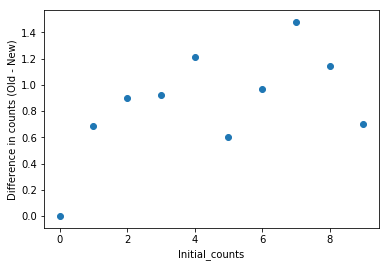

In [14]:
# plotting discount
x = [keys for keys in gtn.keys()]
y = [keys - gtn[keys] for keys in gtn.keys()]
plt.scatter(x, y)
plt.xlabel("Initial_counts")
_ = plt.ylabel("Difference in counts (Old - New)")

As we can see the above graph, the discounts are nearly same with an average value around, `0.957`

In [15]:
print (sum(y[1:])/9)

0.9572585525250573


----